In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline
#Al tratarse de una serie de tiempo colocamos la fecha como indice
st = pd.read_csv("winter.csv", index_col = 3, parse_dates = True)
series = pd.read_csv("winter.csv", index_col = 3, parse_dates = True)
st.head()

,departamento,clase,familia,ExisUnidades,CantidadVendida
FechaCorte,,,,,
2016-01-31,6,601,601001,52733,487
2016-07-31,3,316,316124,13588712,10724
2014-08-31,2,211,211079,9464523,9688
2014-09-30,4,403,403088,481827,614
2014-10-31,2,210,210029,4677398,4613


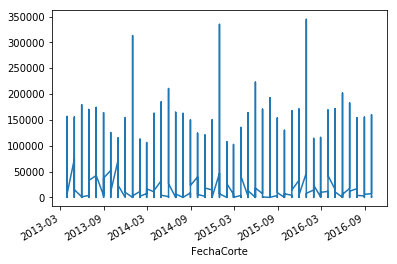

In [42]:
#Vemos una primera grafica de la serie de tiempo
#Podemos observar que a partir del 200000 en la cantidad vendida, existe algo de ruido
st["CantidadVendida"].plot()

In [43]:
#Evaluamos datos estadisticos de los mismos
#La std con respecto a mean esta un poco elevada, quizas suavizar un poco los datos seria lo mas ideal
st["CantidadVendida"].describe()

count     31616.000000
mean      13595.534951
std       20505.590361
min           1.000000
25%        1290.000000
50%        6470.000000
75%       17752.000000
max      344564.000000
Name: CantidadVendida, dtype: float64

In [44]:
#Aplicamos un smooth a los datos por mes
tsd = st["CantidadVendida"].groupby(pd.TimeGrouper(freq='M')).agg('mean')

/home/david/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [45]:
#Vemos que la desviacion estandar ah disminuido, asi como el valor min y max son menos alargados
tsd.describe()

count       43.000000
mean     13620.452329
std       4166.384523
min       8249.425903
25%      11832.500142
50%      12921.238636
75%      14162.053758
max      29315.267663
Name: CantidadVendida, dtype: float64

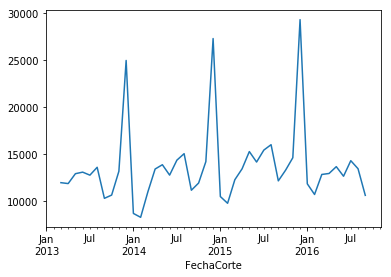

In [46]:
tsd.plot()
#En esta serie de tiempo podemos ver que en los meses de invierno es cuando mas ventas hay, y cada año aumentan las ventas de cada año excepto en el ultimo
#quizas el ultimo invierno las ventas seran aun mayores, parece estar correlacionada y va subiendo

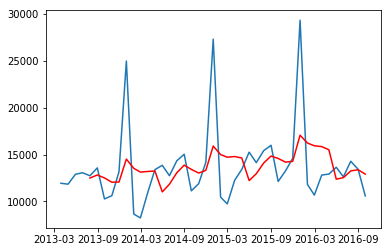

In [47]:
roll = tsd.rolling(window=5).mean()
plt.plot(tsd)
plt.plot(roll, color='red')
#Suavizado con Rolling mean usando hot winters

In [48]:
import statsmodels.api as sm
sm.stats.durbin_watson(tsd)
#Usaremos ARIMA porque el valor esta mas cercano al 0 y confirmar la correlacion

0.17151453033776032

In [49]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [51]:
#Hacemos la prediccion con datos de prueba
X = tsd.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = test[t]
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

TypeError: integer argument expected, got float